In [1]:
import pandas as pd
import re
import requests
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('../FlaskApp/static/data/90to18.csv')

In [4]:
data

,Adult,Genres,Id,Imdb Id,Keywords,Production Companies,Production Countries,Release Date,Year,Tagline,...,Runtime,Vote Average,Vote Count,New Key,Worldwide,Domestic,Foreign,Maded_Profit,Percent_Profit,Good_Movie
0,False,"['Adventure', 'Fantasy', 'Family']",8844,tt0113497,"['giant insect', 'board game', 'jungle', 'disa...","['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],12/15/1995,1995,Roll the dice and unleash the excitement!,...,104.0,6.9,2413.0,"['board game', 'disappearance', 'new home', 'r...",262797249,100475249.0,162322000.0,1,180%+,B
1,False,"['Comedy', 'Drama', 'Romance']",31357,tt0114885,"['based on novel or book', 'interracial relati...",['Twentieth Century Fox Film Corporation'],['United States of America'],12/22/1995,1995,Friends are the people who let you be yourself...,...,127.0,6.1,34.0,"['based on novel', 'interracial relationship',...",81452156,67052156.0,14400000.0,1,180%+,B
2,False,"['Action', 'Crime', 'Drama', 'Thriller']",949,tt0113277,"['robbery', 'detective', 'bank', 'obsession', ...","['Regency Enterprises', 'Forward Pass', 'Warne...",['United States of America'],12/15/1995,1995,A Los Angeles Crime Saga,...,170.0,7.7,1886.0,"['robbery', 'detective', 'bank', 'obsession', ...",187436818,67436818.0,120000000.0,1,180%+,B
3,False,"['Comedy', 'Romance']",11860,tt0114319,"['paris, france', 'sibling relationship', 'cha...","['Paramount Pictures', 'Scott Rudin Production...","['Germany', 'United States of America']",12/15/1995,1995,You are cordially invited to the most surprisi...,...,127.0,6.2,141.0,"['paris', 'brother brother relationship', 'cha...",53696278,53672080.0,24198.0,0,0-(-10)%,B
4,False,"['Action', 'Adventure', 'Thriller']",9091,tt0114576,"['terrorist', 'hostage', 'explosive', 'ice hoc...","['Universal Pictures', 'Imperial Entertainment...",['United States of America'],12/22/1995,1995,Terror goes into overtime.,...,106.0,5.5,174.0,"['terrorist', 'hostage', 'explosive']",64350171,20350171.0,44000000.0,1,90-80%,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,False,['Drama'],318850,tt1002563,"['egypt', 'jesus christ', 'gospel', 'christian...",['Focus Features'],['United States of America'],3/10/2016,2016,"Before he was the savior, he was a child.",...,120.0,6.4,30.0,"['egypt', 'jesus christ', 'gospel', 'christian...",7330338,6490401.0,839937.0,0,(-30)-(-40)%,B
2142,False,"['Action', 'Adventure']",258489,tt0918940,"['africa', 'animal attack', 'feral child', 'ta...","['Village Roadshow Pictures', 'Dark Horse Ente...","['Canada', 'United Kingdom', 'United States of...",6/29/2016,2016,Human. Nature.,...,109.0,5.5,2488.0,"['africa', 'feral child', 'tarzan', 'jungle']",356700357,126643061.0,230057296.0,1,100-90%,C
2143,False,['Horror'],14564,tt0498381,"['hallucination', 'investigation', 'drama', 's...","['Paramount Pictures', 'Vertigo Entertainment'...",['United States of America'],2/1/2017,2017,Evil is reborn.,...,102.0,4.8,1075.0,"['hallucination', 'investigation', 'drama', 's...",83080890,27793018.0,55287872.0,1,180%+,C
2144,False,"['Drama', 'Romance']",14395,tt0449999,"['adultery', 'extramarital affair']","['Yash Raj Films', 'Dharma Productions']",['India'],8/11/2006,2006,A Love.... That Broke All Relationships,...,193.0,6.1,45.0,['adultery'],25229168,3275444.0,21953724.0,1,180%+,B


In [91]:
one= data['Production Countries'][0]
test = re.findall(r"\[*{'iso_3166_1':\s'\w+',\s'name':\s'([\w\s]+)'},*",one)
test
# data['Keywords'].value_counts()

# one=data['Production Companies'][2]
# re.findall(r"\[*{'name':\s'([\w\s.]+)',\s'id':\s\w+},*",one)
# data['Worldwide']= data['Worldwide'].apply(lambda x: ''.join(re.findall(r'\$*(\d+),*',x)))
# data.head()

['United States of America']

In [93]:
data = data.drop(columns = ['Unnamed: 0', 'Overview', 'Revenue'])
data = data.dropna()
# data['Keywords']= data['Keywords'].apply(lambda x: re.findall(r"\[*{'id':\s\w+,\s'name':\s'([\w\s]+)'},*",x))
data['Genres']= data['Genres'].apply(lambda x: re.findall(r"\[*{'id':\s\w+,\s'name':\s'([\w\s]+)'},*",x))
data['Production Companies']= data['Production Companies'].apply(lambda x: re.findall(r"\[*{'name':\s'([\w\s.]+)',\s'id':\s\w+},*",x))
data['Production Countries']= data['Production Countries'].apply(lambda x: re.findall(r"\[*{'iso_3166_1':\s'\w+',\s'name':\s'([\w\s]+)'},*",x))
data['Worldwide']= data['Worldwide'].apply(lambda x: ''.join(re.findall(r'\$*(\d+),*',x)))
data['Foreign']= data['Foreign'].apply(lambda x: ''.join(re.findall(r'\$*(\d+),*',x)))
data['Domestic']= data['Domestic'].apply(lambda x: ''.join(re.findall(r'\$*(\d+),*',x)))

In [7]:
data = data.drop(data.loc[(data['New Key']=='[]') | (data['Budget'] == 0) | (data['Genres']=='[]') | (data['Production Companies']=='[]')].index)
data.to_csv('Resources/90to18.csv',index = False)

In [5]:
goodmovie = []
for row in data['Vote Average']:
    goodmovie.append('A' if row>8 else 'B' if row>6 else 'C'  if row > 4 else 'D' )
#     break
data['Good_Movie']= goodmovie
# goodmovie

In [6]:
# madedprofit = []
percprofit = []
for index,row in data[['Budget','Worldwide']].iterrows():
    make  ='180%+' if row[1]/row[0]>2.80 else '170-160%' \
             if row[1]/row[0]>2.70 else '160-150%' \
             if row[1]/row[0]>2.60 else '160-150%' \
             if row[1]/row[0]>2.50 else '150-140%' \
             if row[1]/row[0]>2.40 else '140-130%' \
             if row[1]/row[0]>2.30 else '130-120%' \
             if row[1]/row[0]>2.20 else '120-110%' \
             if row[1]/row[0]>2.10 else '110-100%' \
             if row[1]/row[0]>2.0 else '100-90%' \
             if row[1]/row[0]>1.90 else '90-80%' \
             if row[1]/row[0]>1.80 else '80-70%' \
             if row[1]/row[0]>1.70 else '70-60%' \
             if row[1]/row[0]>1.60 else '60-50%' \
             if row[1]/row[0]>1.50 else '50-40%' \
             if row[1]/row[0]>1.40 else '40-30%' \
             if row[1]/row[0]>1.30 else '30-20%' \
             if row[1]/row[0]>1.20 else '20-10%' \
             if row[1]/row[0]>1.10 else '10-0%' \
             if row[1]/row[0]>1.0 else '0-(-10)%' \
             if row[1]/row[0]>.90 else '(-10)-(-20)%' \
             if row[1]/row[0]>.80 else '(-20)-(-30)%' \
             if row[1]/row[0]>.70 else '(-30)-(-40)%' 
    percprofit.append(make)
#     break
# data['Maded_Profit'] = madedprofit
data['Percent_Profit'] = percprofit
make
data.head()

,Adult,Genres,Id,Imdb Id,Keywords,Production Companies,Production Countries,Release Date,Year,Tagline,...,Runtime,Vote Average,Vote Count,New Key,Worldwide,Domestic,Foreign,Maded_Profit,Percent_Profit,Good_Movie
0,False,"['Adventure', 'Fantasy', 'Family']",8844,tt0113497,"['giant insect', 'board game', 'jungle', 'disa...","['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],12/15/1995,1995,Roll the dice and unleash the excitement!,...,104.0,6.9,2413.0,"['board game', 'disappearance', 'new home', 'r...",262797249,100475249.0,162322000.0,1,180%+,B
1,False,"['Comedy', 'Drama', 'Romance']",31357,tt0114885,"['based on novel or book', 'interracial relati...",['Twentieth Century Fox Film Corporation'],['United States of America'],12/22/1995,1995,Friends are the people who let you be yourself...,...,127.0,6.1,34.0,"['based on novel', 'interracial relationship',...",81452156,67052156.0,14400000.0,1,180%+,B
2,False,"['Action', 'Crime', 'Drama', 'Thriller']",949,tt0113277,"['robbery', 'detective', 'bank', 'obsession', ...","['Regency Enterprises', 'Forward Pass', 'Warne...",['United States of America'],12/15/1995,1995,A Los Angeles Crime Saga,...,170.0,7.7,1886.0,"['robbery', 'detective', 'bank', 'obsession', ...",187436818,67436818.0,120000000.0,1,180%+,B
3,False,"['Comedy', 'Romance']",11860,tt0114319,"['paris, france', 'sibling relationship', 'cha...","['Paramount Pictures', 'Scott Rudin Production...","['Germany', 'United States of America']",12/15/1995,1995,You are cordially invited to the most surprisi...,...,127.0,6.2,141.0,"['paris', 'brother brother relationship', 'cha...",53696278,53672080.0,24198.0,0,0-(-10)%,B
4,False,"['Action', 'Adventure', 'Thriller']",9091,tt0114576,"['terrorist', 'hostage', 'explosive', 'ice hoc...","['Universal Pictures', 'Imperial Entertainment...",['United States of America'],12/22/1995,1995,Terror goes into overtime.,...,106.0,5.5,174.0,"['terrorist', 'hostage', 'explosive']",64350171,20350171.0,44000000.0,1,90-80%,C


In [105]:
rev_df = pd.read_html(f'https://www.boxofficemojo.com/year/world/{2000+1}/')[0]
rev_df['Year']='2000'
for x in range(20):
    print(x+1)
    temp = pd.read_html(f'https://www.boxofficemojo.com/year/world/{2000+x+1}/')[0]
    temp['Year'] = f'{2000+x+1}'
    rev_df = pd.concat([rev_df,temp],ignore_index = True)
final_rev_df = rev_df.drop(columns = ['%','%.1','Rank'])

1


In [110]:
# rev_df = pd.concat([rev_df,temp],ignore_index = True)
rev_df.drop(columns = ['%','%.1','Rank'])

,Release Group,Worldwide,Domestic,Foreign,Year,year
0,Harry Potter and the Sorcerer's Stone,"$974,755,371","$317,575,550","$657,179,821",2000,NaN
1,The Lord of the Rings: The Fellowship of the Ring,"$883,726,270","$313,364,114","$570,362,156",2000,NaN
2,"Monsters, Inc.","$528,773,250","$255,873,250","$272,900,000",2000,NaN
3,Shrek,"$484,409,218","$267,665,011","$216,744,207",2000,NaN
4,Ocean's Eleven,"$450,717,150","$183,417,150","$267,300,000",2000,NaN
...,...,...,...,...,...,...
803,Ginger Snaps,"$2,554","$2,554",-,NaN,2001
804,Whatever Happened to Harold Smith?,"$2,543","$2,543",-,NaN,2001
805,"Love, Honor and Obey","$1,400","$1,400",-,NaN,2001
806,The Last Wave 2001 Re-release,$957,$957,-,NaN,2001


In [15]:
# data = data.drop(columns=['Unnamed: 0','Unnamed: 0.1'])

In [8]:
data.to_csv('../Resources/90to18.csv',index = False)

In [11]:
data['Percent_Profit'].value_counts()

180%+           764
(-30)-(-40)%    426
0-(-10)%         71
160-150%         70
20-10%           70
(-20)-(-30)%     54
(-10)-(-20)%     52
110-100%         52
70-60%           51
130-120%         50
10-0%            50
30-20%           50
80-70%           46
60-50%           44
40-30%           43
120-110%         42
90-80%           40
50-40%           40
140-130%         37
170-160%         35
100-90%          34
150-140%         25
Name: Percent_Profit, dtype: int64

In [18]:
data['Percent_Profit'] = pd.qcut(data['Worldwide']/data['Budget'],20)
data['Good_Movie'] = pd.qcut(data['Vote Average'],4, labels =['D','C','B','A'])
data.head()

,Adult,Genres,Id,Imdb Id,Keywords,Production Companies,Production Countries,Release Date,Year,Tagline,...,Runtime,Vote Average,Vote Count,New Key,Worldwide,Domestic,Foreign,Maded_Profit,Percent_Profit,Good_Movie
0,False,"['Adventure', 'Fantasy', 'Family']",8844,tt0113497,"['giant insect', 'board game', 'jungle', 'disa...","['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],12/15/1995,1995,Roll the dice and unleash the excitement!,...,104.0,6.9,2413.0,"['board game', 'disappearance', 'new home', 'r...",262797249,100475249.0,162322000.0,1,"(3.614, 4.227]",A
1,False,"['Comedy', 'Drama', 'Romance']",31357,tt0114885,"['based on novel or book', 'interracial relati...",['Twentieth Century Fox Film Corporation'],['United States of America'],12/22/1995,1995,Friends are the people who let you be yourself...,...,127.0,6.1,34.0,"['based on novel', 'interracial relationship',...",81452156,67052156.0,14400000.0,1,"(5.085, 6.787]",C
2,False,"['Action', 'Crime', 'Drama', 'Thriller']",949,tt0113277,"['robbery', 'detective', 'bank', 'obsession', ...","['Regency Enterprises', 'Forward Pass', 'Warne...",['United States of America'],12/15/1995,1995,A Los Angeles Crime Saga,...,170.0,7.7,1886.0,"['robbery', 'detective', 'bank', 'obsession', ...",187436818,67436818.0,120000000.0,1,"(2.852, 3.176]",A
3,False,"['Comedy', 'Romance']",11860,tt0114319,"['paris, france', 'sibling relationship', 'cha...","['Paramount Pictures', 'Scott Rudin Production...","['Germany', 'United States of America']",12/15/1995,1995,You are cordially invited to the most surprisi...,...,127.0,6.2,141.0,"['paris', 'brother brother relationship', 'cha...",53696278,53672080.0,24198.0,0,"(0.905, 1.077]",C
4,False,"['Action', 'Adventure', 'Thriller']",9091,tt0114576,"['terrorist', 'hostage', 'explosive', 'ice hoc...","['Universal Pictures', 'Imperial Entertainment...",['United States of America'],12/22/1995,1995,Terror goes into overtime.,...,106.0,5.5,174.0,"['terrorist', 'hostage', 'explosive']",64350171,20350171.0,44000000.0,1,"(1.739, 2.004]",D


In [6]:
data.to_csv('../FlaskApp/static/data/90to18.csv',index = False)

In [162]:
data = pd.read_csv('../FlaskApp/static/data/Alldata.csv').drop(columns = 'Unnamed: 0')

In [163]:
data.head()

,Adult,Genres,Id,Imdb Id,Keywords,Overview,Production Companies,Production Countries,Release Date,Year,Tagline,Title,Budget,Popularity,Revenue,Runtime,Vote Average,Vote Count,New Key
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,"['jealousy', 'toy', 'boy', 'friendship', 'frie...","Led by Woody, Andy's toys live happily in his ...","[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",10/30/1995,1995,NaN,Toy Story,30000000,21.946943,373554033.0,81.0,7.7,5415.0,"['jealousy', 'toy', 'boy', 'friendship', 'frie..."
1,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,"['giant insect', 'board game', 'jungle', 'disa...",When siblings Judy and Peter discover an encha...,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",12/15/1995,1995,Roll the dice and unleash the excitement!,Jumanji,65000000,17.015539,262797249.0,104.0,6.9,2413.0,"['board game', 'disappearance', 'new home', 'r..."
2,False,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,"['fishing', 'old man', 'best friend', 'duringc...",A family wedding reignites the ancient feud be...,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",12/22/1995,1995,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,0,11.712900,0.0,101.0,6.5,92.0,"['fishing', 'best friend', 'duringcreditssting..."
3,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,"['based on novel or book', 'interracial relati...","Cheated on, mistreated and stepped on, the wom...",[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/22/1995,1995,Friends are the people who let you be yourself...,Waiting to Exhale,16000000,3.859495,81452156.0,127.0,6.1,34.0,"['based on novel', 'interracial relationship',..."
4,False,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,"['baby', 'midlife crisis', 'confidence', 'agin...",Just when George Banks has recovered from his ...,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/10/1995,1995,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,0,8.387519,76578911.0,106.0,5.7,173.0,"['baby', 'midlife crisis', 'confidence', 'agin..."


In [3]:
keywords = pd.read_csv('../FlaskApp/static/data/keywords.csv').drop(columns = 'Unnamed: 0')
genres = pd.read_csv('../FlaskApp/static/data/genres.csv').drop(columns = 'Unnamed: 0')

In [165]:
keywords.head()

,Id,Title,New Key
0,862,Toy Story,jealousy
1,862,Toy Story,toy
2,862,Toy Story,boy
3,862,Toy Story,friendship
4,862,Toy Story,friends


In [166]:
keyword_df = keywords.merge(data[['Year','Id']], on = 'Id')
genre_df = genres.merge(data[['Year','Id']], on = 'Id')

In [167]:
genre_df['Genres'].unique()

array(['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History',
       'Mystery', 'War', 'Foreign', nan, 'Music', 'Documentary',
       'Western'], dtype=object)

In [168]:
keyword_df['New Key'].unique()

array(['jealousy', 'toy', 'boy', ..., 'captivity', 'corn plantation',
       'senate hearing'], dtype=object)

In [169]:
genre_df.groupby('Year')['Genres']

In [170]:
years = genre_df['Year'].unique()
years

array([1995, 1994, 1996, 1976, 1992, 1967, 1993, 1964, 1977, 1991, 1965,
       1982, 1985, 1990, 1989, 1937, 1940, 1969, 1981, 1974, 1970, 1960,
       1955, 1959, 1968, 1980, 1988, 1975, 2002, 1948, 1943, 1950, 1987,
       1973, 1997, 1956, 1958, 1949, 1972, 1953, 1998, 1933, 1952, 1951,
       1957, 1961, 1954, 1934, 1944, 1963, 1942, 1941, 1939, 1947, 1946,
       1945, 1938, 1935, 1936, 1926, 1932, 1979, 1971, 1986, 1978, 1966,
       1962, 1983, 1984, 1931, 1922, 1927, 1929, 1930, 1928, 1925, 1999,
       2000, 1919, 1923, 1920, 1918, 1921, 2001, 1924, 2003, 2007, 1915,
       2004, 1916, 1917, 2005, 2006, 1902, 1903, 2008, 2009, 1914, 1912,
       2010, 2012, 1913, 1898, 1899, 2011, 1894, 1909, 1910, 1901, 1893,
       1896, 2013, 2014, 1895, 1911, 2015, 1900, 2016, 2017, 1905, 1904,
       1891], dtype=int64)

In [178]:
test = list(genre_df['Genres'].unique())
test.pop(15)
test.insert(0,'Year')
genreyears = pd.DataFrame(columns= test)
for year in years:
    genreyears = genreyears.append(genre_df.loc[genre_df['Year'] == year]['Genres'].value_counts().T)
genreyears['Year']=list(years)
genreyears = genreyears.sort_values('Year').fillna(0)

genreyears = genreyears.set_index('Year').reset_index()

In [179]:
genreyears

,Year,Animation,Comedy,Family,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,History,Mystery,War,Foreign,Music,Documentary,Western
0,1891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1893,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1895,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1896,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2013,3.0,8.0,3.0,4.0,5.0,0.0,12.0,4.0,5.0,5.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
118,2014,2.0,5.0,2.0,3.0,2.0,2.0,10.0,5.0,3.0,5.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
119,2015,0.0,1.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,2016,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


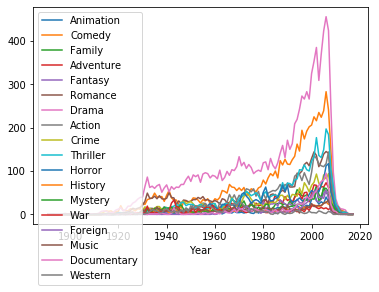

In [194]:
genreyears.plot(y = list(genreyears.columns)[1:], x = 'Year', kind = 'line')
plt.show()

In [181]:
genreyears.describe()

,Year,Animation,Comedy,Family,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,History,Mystery,War,Foreign,Music,Documentary,Western
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,1956.131148,5.959016,56.500000,11.795082,17.409836,10.500000,34.434426,93.655738,30.483607,21.450820,32.762295,18.909836,6.467213,11.549180,7.204918,6.401639,7.729508,8.836066,6.098361
std,35.953586,9.242730,65.746602,15.918666,18.131181,12.672121,36.847460,101.171140,35.312123,22.665043,42.758220,23.388209,6.322182,12.490064,6.781036,12.150339,7.118869,17.112830,6.998713
min,1891.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1926.250000,0.000000,8.000000,0.000000,2.000000,1.250000,3.250000,12.000000,2.250000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1956.500000,2.000000,35.000000,5.500000,12.500000,5.000000,29.000000,77.000000,16.000000,16.000000,18.500000,8.000000,6.000000,9.500000,6.000000,0.000000,8.000000,2.500000,4.000000
75%,1986.750000,7.000000,63.750000,13.750000,25.750000,12.750000,40.500000,111.500000,51.250000,28.750000,44.750000,31.750000,9.750000,17.000000,11.000000,7.000000,12.000000,8.000000,8.000000
max,2017.000000,52.000000,283.000000,66.000000,73.000000,56.000000,145.000000,456.000000,144.000000,94.000000,197.000000,117.000000,29.000000,62.000000,33.000000,56.000000,33.000000,95.000000,28.000000


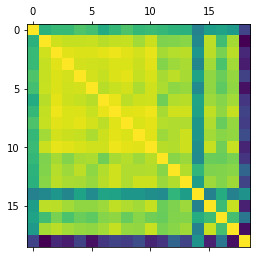

In [183]:
plt.matshow(genreyears.corr())
plt.show()

In [184]:
corr = genreyears.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Animation,Comedy,Family,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,History,Mystery,War,Foreign,Music,Documentary,Western
Year,1.000000,0.630515,0.660409,0.663231,0.712641,0.688318,0.602312,0.652517,0.708504,0.655281,0.669059,0.654525,0.631674,0.625789,0.420091,0.544804,0.560944,0.520618,0.173955
Animation,0.630515,1.000000,0.923343,0.909959,0.907122,0.911684,0.888352,0.905781,0.907485,0.855228,0.918219,0.798708,0.802532,0.817463,0.448333,0.898476,0.680352,0.861833,-0.036604
Comedy,0.660409,0.923343,1.000000,0.954983,0.945475,0.944743,0.959416,0.973745,0.953149,0.930283,0.963118,0.860795,0.886100,0.893791,0.507003,0.891107,0.792444,0.893672,0.080159
Family,0.663231,0.909959,0.954983,1.000000,0.930554,0.925640,0.920292,0.941452,0.943107,0.915701,0.952427,0.808951,0.847190,0.868479,0.441005,0.857566,0.705235,0.855921,0.044023
Adventure,0.712641,0.907122,0.945475,0.930554,1.000000,0.930397,0.910756,0.943965,0.957758,0.910230,0.936324,0.863435,0.898528,0.865881,0.565027,0.828582,0.765182,0.835013,0.163282
Fantasy,0.688318,0.911684,0.944743,0.925640,0.930397,1.000000,0.888057,0.914533,0.930732,0.873639,0.926958,0.872698,0.822522,0.841899,0.463042,0.826846,0.741190,0.827186,0.008853
Romance,0.602312,0.888352,0.959416,0.920292,0.910756,0.888057,1.000000,0.966073,0.894822,0.919775,0.926543,0.774414,0.881775,0.886858,0.568909,0.846563,0.813721,0.857014,0.127477
Drama,0.652517,0.905781,0.973745,0.941452,0.943965,0.914533,0.966073,1.000000,0.947982,0.956578,0.974064,0.864300,0.923228,0.924567,0.561135,0.901479,0.827390,0.908601,0.174811
Action,0.708504,0.907485,0.953149,0.943107,0.957758,0.930732,0.894822,0.947982,1.000000,0.943072,0.958374,0.885762,0.874551,0.878342,0.512115,0.875254,0.759600,0.836097,0.151325
Crime,0.655281,0.855228,0.930283,0.915701,0.910230,0.873639,0.919775,0.956578,0.943072,1.000000,0.952849,0.848873,0.874839,0.921502,0.510342,0.856820,0.816864,0.833557,0.209578


In [197]:
test2 = list(keyword_df['New Key'].unique())
# test2.pop(15)
test2.insert(0,'Year')
keywordsyears = pd.DataFrame(columns= test2)
for year in years:
    keywordsyears = keywordsyears.append(keyword_df.loc[keyword_df['Year'] == year]['New Key'].value_counts().T)
keywordsyears['Year']=list(years)
keywordsyears = keywordsyears.sort_values('Year').fillna(0)

keywordsyears = keywordsyears.set_index('Year').reset_index()

In [203]:
keywordsyears.set_index('Year').T

Year,1891,1893,1894,1895,1896,1898,1899,1900,1901,1902,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
jealousy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
toy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
boy,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
friendship,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
friends,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
card,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
toronto maple leafs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
captivity,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
corn plantation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [206]:
keywordsyears.describe()

,Year,jealousy,toy,boy,friendship,friends,rivalry,boy next door,new toy,board game,...,chinese opera,helicopter pilot,american wilderness,pacific northwest,sixth grader,card,toronto maple leafs,captivity,corn plantation,senate hearing
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,...,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,1956.131148,1.262295,0.131148,0.336066,1.934426,0.836066,0.434426,0.024590,0.016393,0.016393,...,0.008197,0.008197,0.008197,0.008197,0.008197,0.008197,0.008197,0.008197,0.008197,0.008197
std,35.953586,2.064270,0.384639,0.624707,3.446732,1.726606,1.075556,0.155511,0.127507,0.127507,...,0.090536,0.090536,0.090536,0.090536,0.090536,0.090536,0.090536,0.090536,0.090536,0.090536
min,1891.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1926.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1956.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1986.750000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,10.000000,2.000000,3.000000,18.000000,11.000000,8.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


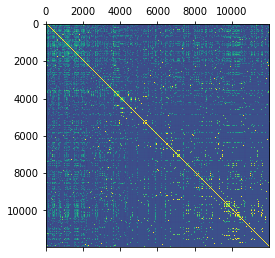

In [204]:
plt.matshow(keywordsyears.corr())
plt.show()

In [17]:
keywords = pd.read_csv('../FlaskApp/static/data/keywords.csv').drop(columns = 'Unnamed: 0')
prodco = pd.read_csv('../FlaskApp/static/data/productionco.csv').drop(columns = 'Unnamed: 0')
countries = pd.read_csv('../FlaskApp/static/data/countries.csv').drop(columns = 'Unnamed: 0')
# companies = {y for x in data['Production Companies'] 
#              for y in re.findall(r"\'([\w ]+)\'",x)}
[(x,x)for x in prodco['Production Companies'].value_counts().head(25).keys()]

[('Paramount Pictures', 'Paramount Pictures'),
 ('Universal Pictures', 'Universal Pictures'),
 ('Twentieth Century Fox Film Corporation',
  'Twentieth Century Fox Film Corporation'),
 ('Columbia Pictures Corporation', 'Columbia Pictures Corporation'),
 ('Columbia Pictures', 'Columbia Pictures'),
 ('United Artists', 'United Artists'),
 ('New Line Cinema', 'New Line Cinema'),
 ('Miramax Films', 'Miramax Films'),
 ('Walt Disney Pictures', 'Walt Disney Pictures'),
 ('TriStar Pictures', 'TriStar Pictures'),
 ('Regency Enterprises', 'Regency Enterprises'),
 ('DreamWorks SKG', 'DreamWorks SKG'),
 ('Channel Four Films', 'Channel Four Films'),
 ('Touchstone Pictures', 'Touchstone Pictures'),
 ('Village Roadshow Pictures', 'Village Roadshow Pictures'),
 ('StudioCanal', 'StudioCanal'),
 ('Gaumont', 'Gaumont'),
 ('TF1 Films Production', 'TF1 Films Production'),
 ('Fox Searchlight Pictures', 'Fox Searchlight Pictures'),
 ('Imagine Entertainment', 'Imagine Entertainment'),
 ('France 2 Cinéma', 'Fran

In [19]:
# countries = {y for x in data['Production Countries'] 
#              for y in re.findall(r"\'([\w ]+)\'",x)}
[(x,x)for x in countries['Primary Country'].value_counts().head(25).keys()]

[('  United States of America', '  United States of America'),
 ('  United Kingdom', '  United Kingdom'),
 ('  France', '  France'),
 ('  Japan', '  Japan'),
 ('  Germany', '  Germany'),
 ('  Italy', '  Italy'),
 ('  Canada', '  Canada'),
 ('  Australia', '  Australia'),
 ('  Hong Kong', '  Hong Kong'),
 ('  Spain', '  Spain'),
 ('  Sweden', '  Sweden'),
 ('  Russia', '  Russia'),
 ('  Finland', '  Finland'),
 ('  Denmark', '  Denmark'),
 ('  India', '  India'),
 ('  South Korea', '  South Korea'),
 ('  China', '  China'),
 ('  Mexico', '  Mexico'),
 ('  Poland', '  Poland'),
 ('  Belgium', '  Belgium'),
 ('  Czech Republic', '  Czech Republic'),
 ('  Brazil', '  Brazil'),
 ('  Ireland', '  Ireland'),
 ('  Austria', '  Austria'),
 ('  Argentina', '  Argentina')]

In [20]:
[(x,x)for x in keywords['New Key'].value_counts().head(25).keys()]

[('independent film', 'independent film'),
 ('murder', 'murder'),
 ('based on novel', 'based on novel'),
 ('sex', 'sex'),
 ('nudity', 'nudity'),
 ('musical', 'musical'),
 ('violence', 'violence'),
 ('revenge', 'revenge'),
 ('love', 'love'),
 ('suspense', 'suspense'),
 ('female nudity', 'female nudity'),
 ('police', 'police'),
 ('world war ii', 'world war ii'),
 ('prison', 'prison'),
 ('biography', 'biography'),
 ('friendship', 'friendship'),
 ('sport', 'sport'),
 ('sequel', 'sequel'),
 ('woman director', 'woman director'),
 ('paris', 'paris'),
 ('new york', 'new york'),
 ('suicide', 'suicide'),
 ('rape', 'rape'),
 ('teenager', 'teenager'),
 ('drug', 'drug')]

In [21]:
import os, sys

# Open a file
path = "../FlaskApp/static/assets/images/movies/"
dirs = os.listdir( path )
dirs

['0032429329820_p0_v2_s1200x630.jpg',
 '518XgzZTFxL._SY445_.jpg',
 '51OHnp0WGZL._AC_.jpg',
 'image (1).png',
 'image.png',
 'image_ed8d7a4e.jpeg',
 'Love_Actually_movie.jpg',
 'MMVD7F1D1E94F199006B65DB86285C05C7E4.jpeg',
 'MV5BN2Y0NWRkNWItZWEwNi00MDNlLWJmZDYtNTkwYzI5Nzg4MjVjXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_.jpg',
 'MV5BNTA3NjU3OTM2MV5BMl5BanBnXkFtZTgwNjQ2MzE1NjM@._V1_.jpg',
 'MV5BZjRlNDUxZjAtOGQ4OC00OTNlLTgxNmQtYTBmMDgwZmNmNjkxXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_.jpg',
 'NationalLampoonsChristmasVacationPoster.jpeg',
 'open-uri20150422-12561-1kqpnte_5d4f6f42.jpeg']

In [22]:
import random
random.seed(1)
random.randint(0,len(dirs))
random.randint(0,len(dirs)-1)

In [7]:
temp = {'(-0.0009794, 0.19]': 'less than 19 %',
     '(0.19, 0.369]': '19-36%',
        '(0.369, 0.531]': '36-53%','(0.531, 0.707]': '50-70%',
      '(0.707, 0.905]': '70-90%', '(0.905, 1.077]': '90-107%',
        '(1.077, 1.252]': '107-125%', '(1.252, 1.509]': '120-150%', 
        '(1.509, 1.739]': '150-173%', '(1.739, 2.004]': '173-200%',
        '(2.004, 2.223]': '200-222%', '(2.223, 2.531]': '222-253%',
          '(2.531, 2.852]': '253-285%', '(2.852, 3.176]': '285-317%',
            '(3.176, 3.614]': '317-361%', '(3.614, 4.227]': '361-422%',
            '(4.227, 5.085]': '422-508%', '(5.085, 6.787]': '508-678%',
            '(6.787, 10.635]': '678-1065%',
                '(10.635, 6552255.0]': '1060%+'}


{'less than 19 %': '(-0.0009794, 0.19]',
 '19-36%': '(0.19, 0.369]',
 '36-53%': '(0.369, 0.531]',
 '50-70%': '(0.531, 0.707]',
 '70-90%': '(0.707, 0.905]',
 '90-107%': '(0.905, 1.077]',
 '107-125%': '(1.077, 1.252]',
 '120-150%': '(1.252, 1.509]',
 '150-173%': '(1.509, 1.739]',
 '173-200%': '(1.739, 2.004]',
 '200-222%': '(2.004, 2.223]',
 '222-253%': '(2.223, 2.531]',
 '253-285%': '(2.531, 2.852]',
 '285-317%': '(2.852, 3.176]',
 '317-361%': '(3.176, 3.614]',
 '361-422%': '(3.614, 4.227]',
 '422-508%': '(4.227, 5.085]',
 '508-678%': '(5.085, 6.787]',
 '678-1065%': '(6.787, 10.635]',
 '1060%+': '(10.635, 6552255.0]'}

In [8]:
temp['(6.787, 10.635]']

'678-1065%'